## Module import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
import IPython.display as ipd
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
## Loading the dataset 
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
#       print(os.path.join(dirname, filename))
#         print(filename)
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label)
#         print(label)
        

In [3]:
## Path of the audio files
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [4]:
labels[:5]
## represents the categories of audio files

['fear', 'fear', 'fear', 'fear', 'fear']

In [5]:
df=pd.DataFrame()
df['data']=paths
df['labels']=labels
df.shape
## defining the dataframe where data is path of audio files and labels having the categories of the audio files

(5600, 2)

## Exploratory Data Analysis

In [6]:
df["data"][0]

'/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav'

In [7]:
df["labels"].value_counts()
## We have 7 categories of audio dataset

labels
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

In [8]:
ipd.Audio(df["data"][200])
## To listen the audio file

In [9]:
data,sr=librosa.load(df["data"][0],)
print({'data':data[:10]})
print({"data_shape":data.shape})
print({'sample_rate':sr})
## data is numerical representation of the sound signal over time (it's a time series),
## sampling rate is how many samples(data) of the audio signal were taken per second 

{'data': array([ 9.8906516e-04, -1.8923520e-04, -3.2637705e-05,  4.2498563e-04,
       -1.5508967e-03, -4.7025149e-04, -1.4927909e-03, -9.4698963e-04,
        1.3880471e-03,  1.2672214e-04], dtype=float32)}
{'data_shape': (30839,)}
{'sample_rate': 22050}


In [10]:
data

array([ 9.8906516e-04, -1.8923520e-04, -3.2637705e-05, ...,
        3.8491038e-04,  6.6251284e-04,  1.6681573e-04], dtype=float32)

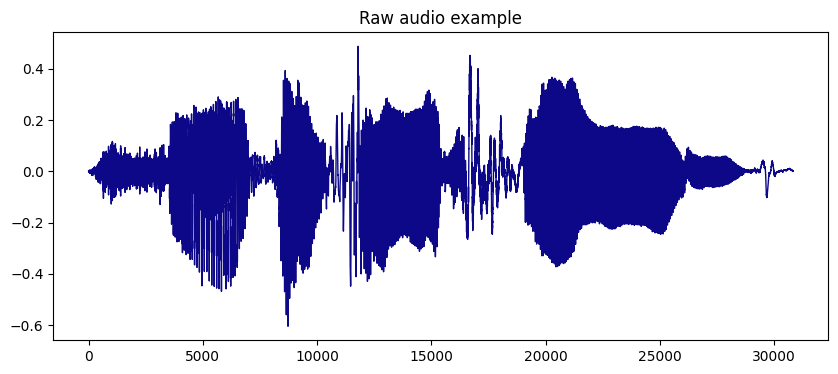

In [11]:
## Plot of audio time series data

pd.Series(data).plot(figsize=(10,4),
                 lw=1,
                 title="Raw audio example",
                 cmap="plasma")
plt.show()


In [12]:
data.shape
# data

(30839,)

In [13]:
librosa.effects.trim(data)

## trim or cut sections of the audio signal at where there is little or no sound 

(array([ 9.8906516e-04, -1.8923520e-04, -3.2637705e-05, ...,
         3.8491038e-04,  6.6251284e-04,  1.6681573e-04], dtype=float32),
 array([    0, 30839]))

In [14]:
trimmed_data,index=librosa.effects.trim(data,top_db=10)
trimmed_data.shape
## to remove silence which is close to 10 decibal

(23552,)

In [15]:
index

array([ 3072, 26624])

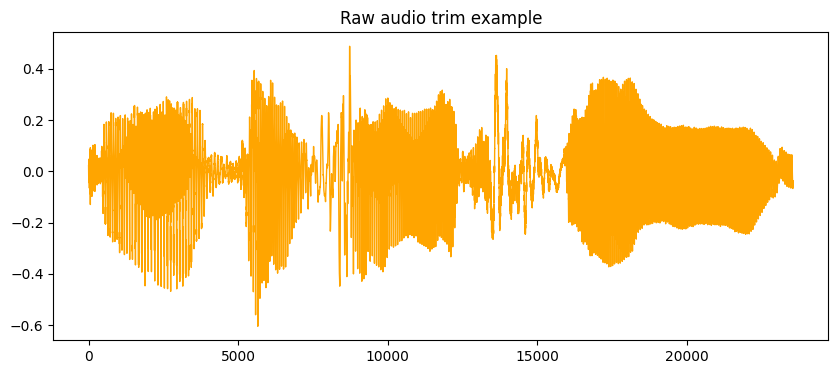

In [16]:
## Plot of trimmed audio time series data 

pd.Series(trimmed_data).plot(figsize=(10,4),
                 lw=1,
                 title="Raw audio trim example",
                 color="orange")
plt.show()

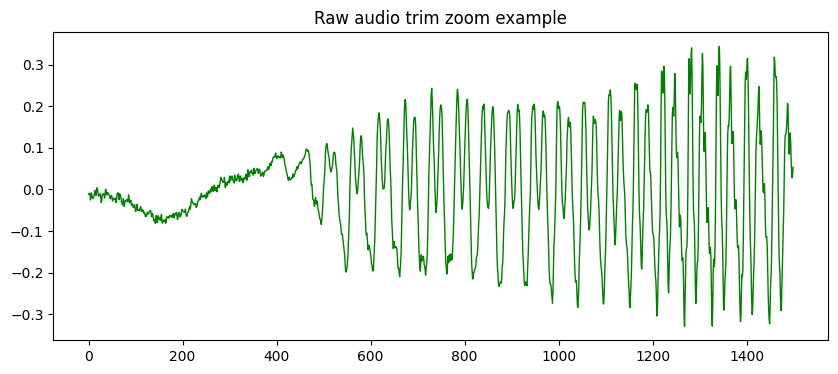

In [17]:
pd.Series(trimmed_data[15500:17000]).plot(figsize=(10,4),
                 lw=1,
                 title="Raw audio trim zoom example",
                 color="green")
plt.show()

## zoom out the trimmed data 

**Spectrogram**

In [18]:
d=librosa.stft(data)
## short-time fourier tranformation of the data to analyze frequency of the audio data 

sd=librosa.amplitude_to_db(np.abs(d),ref=np.max(d)) 
## magnitude(amplitude) to decibal 
sd.shape


(1025, 61)

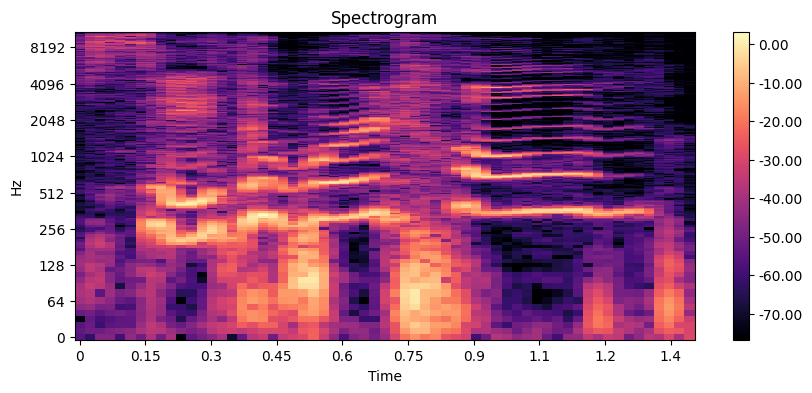

In [19]:
# plot the spectrogram to analyze the frequency spectrum of the audio data
fig, ax=plt.subplots(figsize=(10,4))
img=librosa.display.specshow(sd,x_axis="time",y_axis="log")
ax.set_title("Spectrogram")
fig.colorbar(img,ax=ax,format=f'%0.2f')
plt.show()

In [20]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10.7,4))
    plt.title(emotion,size=15)
    librosa.display.waveshow(data)
    plt.show()
    
def spectrogram(data, sr, emotion):
    fig, ax = plt.subplots(figsize=(10, 4))
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(np.abs(x), ref=np.max)
    img = librosa.display.specshow(xdb, sr=sr, x_axis="time", y_axis="log", ax=ax)
    ax.set_title(emotion, size=15)
    fig.colorbar(img, ax=ax, format='%0.2f')
    plt.tight_layout()
    plt.show()
    
    ## funtion for waveplot and spectrogram of each categories of the audio data 

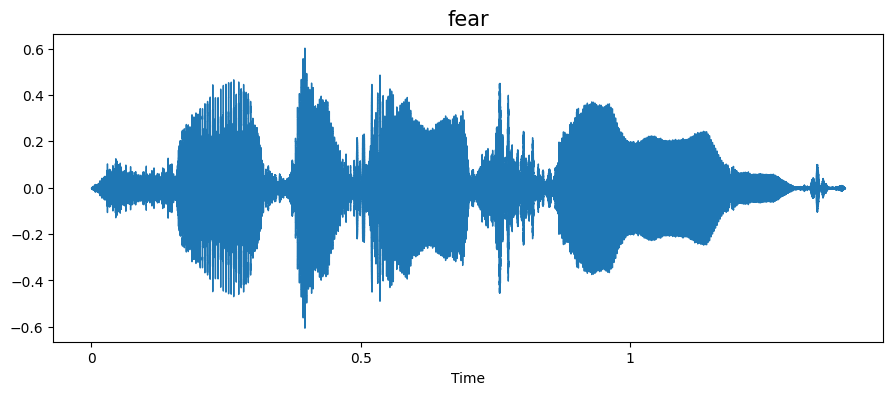

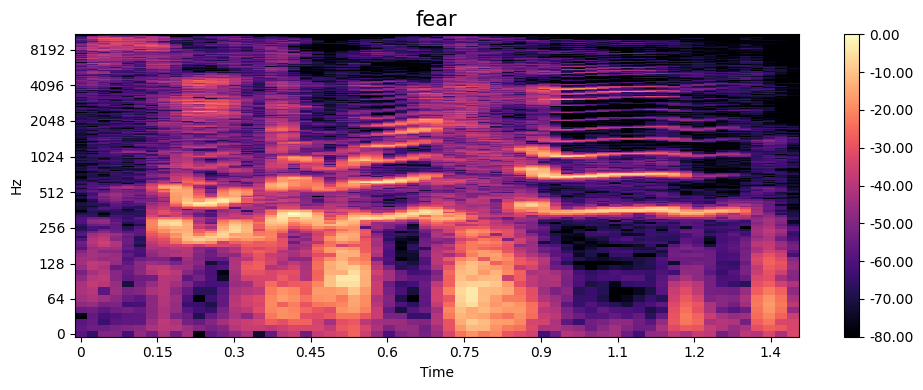

In [21]:
emotion="fear"
path=df["data"][df["labels"]==emotion][0]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)


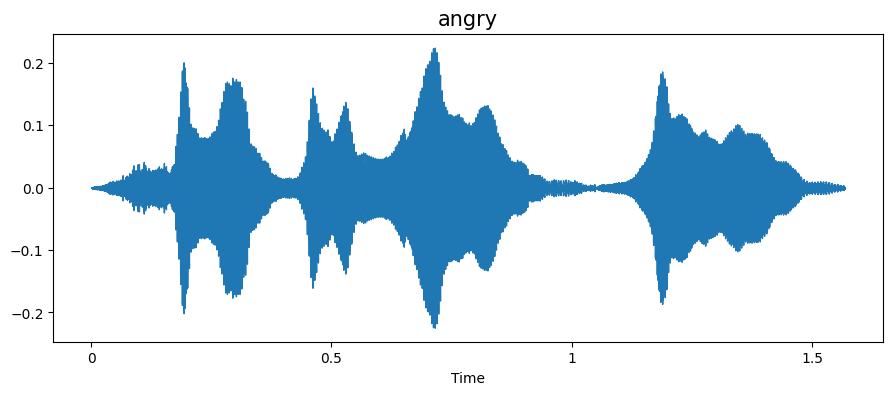

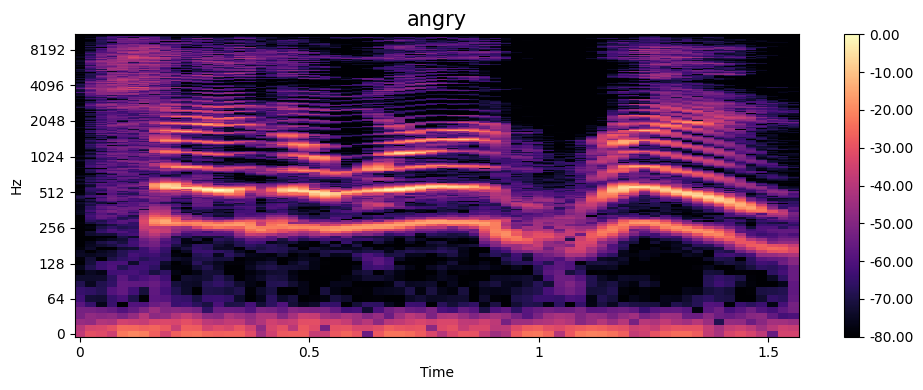

In [22]:
emotion="angry"
path=np.array(df["data"][df["labels"]==emotion])[0]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)


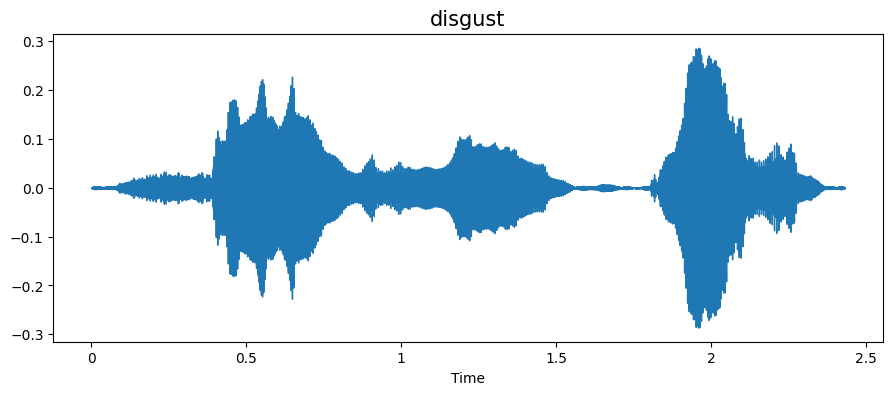

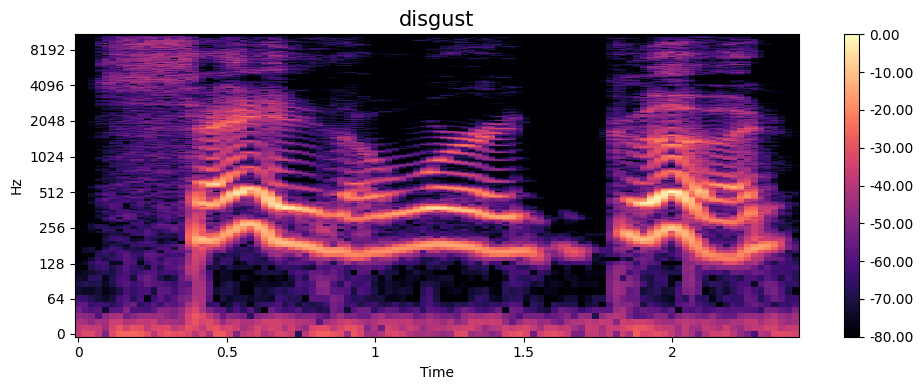

In [23]:
emotion="disgust"
path=np.array(df["data"][df["labels"]==emotion])[0]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)

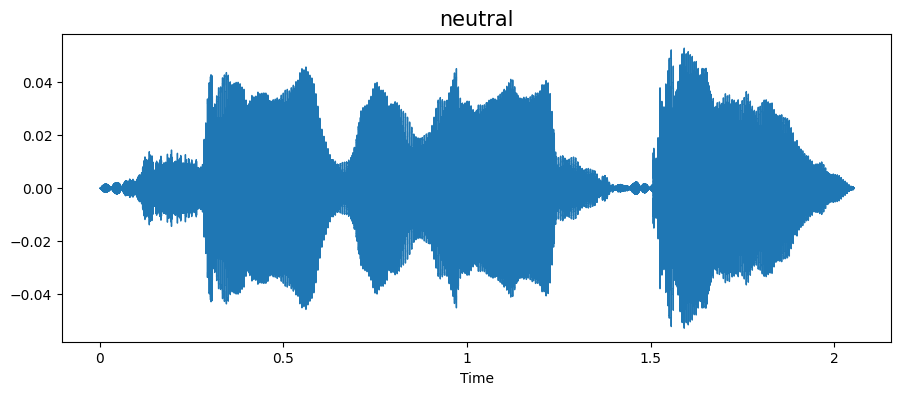

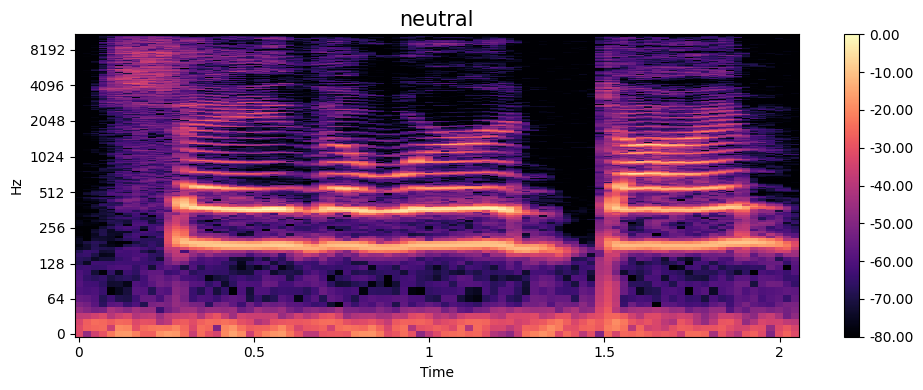

In [24]:
emotion="neutral"
path=np.array(df["data"][df["labels"]==emotion])[1]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)

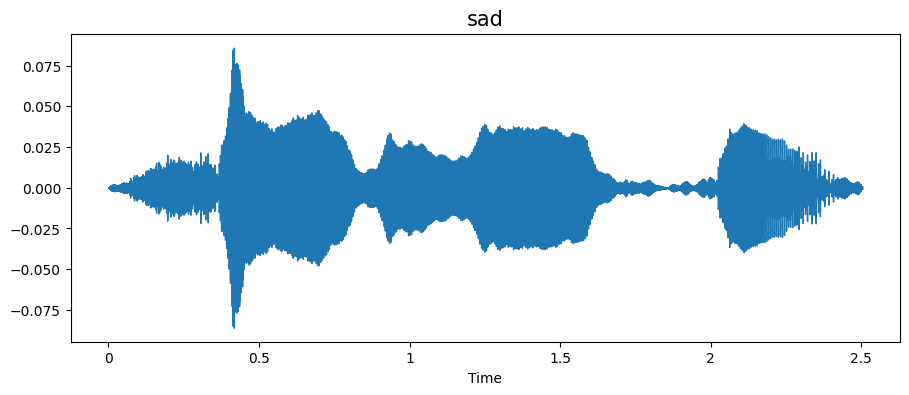

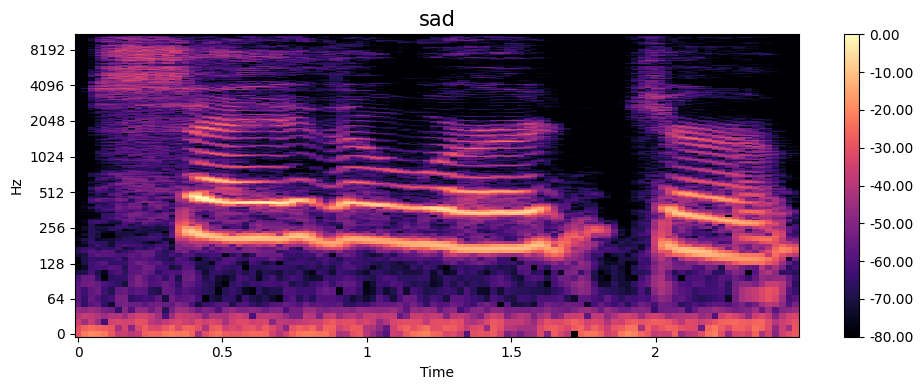

In [25]:
emotion="sad"
path=np.array(df["data"][df["labels"]==emotion])[0]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)

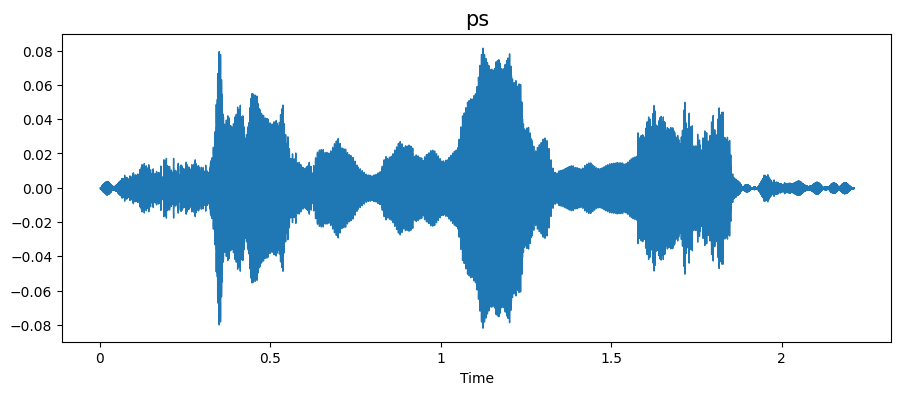

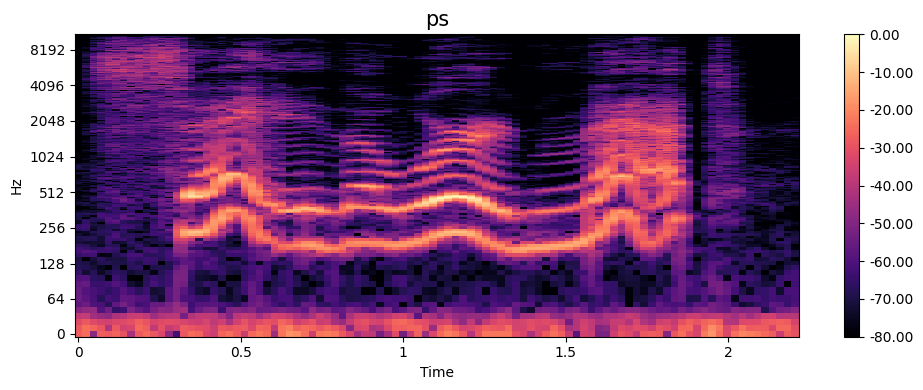

In [26]:
emotion="ps"
path=np.array(df["data"][df["labels"]==emotion])[0]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)

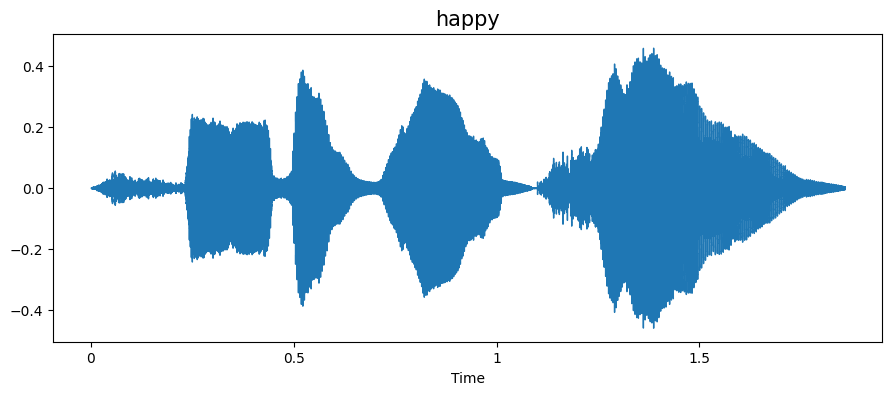

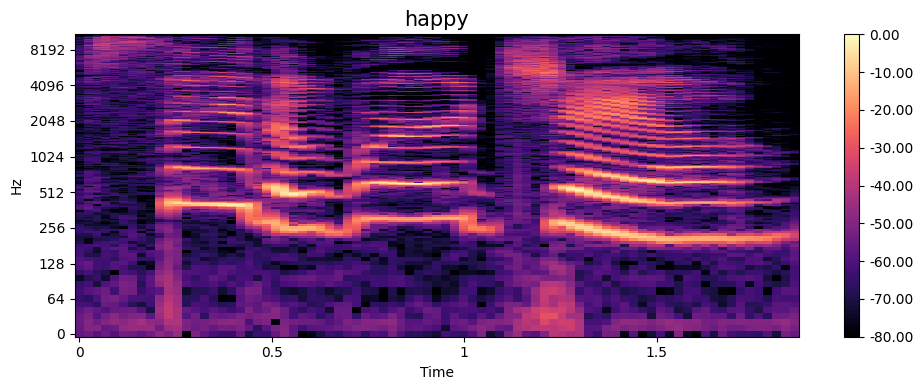

In [27]:
emotion="happy"
path=np.array(df["data"][df["labels"]==emotion])[0]
data,sr=librosa.load(path)
waveplot(data,sr,emotion)
spectrogram(data,sr,emotion)
ipd.Audio(path)

## Feature Extraction


In [28]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

## MFCCs are a powerful tool for analyzing and understanding audio signals, 
## capturing the perceptual characteristics of sound in a way that aligns with human auditory perception.

In [29]:
extract_mfcc(df["data"][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [30]:
## this will be x variable
x_mfcc=df["data"].apply(lambda x:extract_mfcc(x))

In [31]:
x_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: data, Length: 5600, dtype: object

In [32]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape
# x

(5600, 40)

In [33]:
## input split 
x=np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [34]:
# x

In [35]:
# y=to_categorical(df["labels"])
enc=OneHotEncoder()
y=enc.fit_transform(df[["labels"]])
y.shape

(5600, 7)

In [36]:
y=y.toarray()
## store the y data into array

## Creat LSTM Model

In [37]:
## LSTM Model 

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(123,activation="relu"),
    Dropout(0.2),
    Dense(32,activation="relu"),
    Dropout(0.2),
    Dense(7,activation="softmax")
])
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 123)            │        15,252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 123)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,951 (316.21 KB)

 Trainable params: 80,951 (316.21 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
## Train the model
history=model.fit(x,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3326 - loss: 1.8480 - val_accuracy: 0.1205 - val_loss: 1.8629
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5708 - loss: 1.4060 - val_accuracy: 0.1071 - val_loss: 1.8926
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6488 - loss: 0.9764 - val_accuracy: 0.1491 - val_loss: 1.5686
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7166 - loss: 0.7526 - val_accuracy: 0.4875 - val_loss: 1.1366
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7821 - loss: 0.6041 - val_accuracy: 0.7009 - val_loss: 0.8766
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8326 - loss: 0.4762 - val_accuracy: 0.7821 - val_loss: 0.6469
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8902 - loss: 0.3406 - val_accuracy: 0.8705 - val_loss: 0.4362
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9196 - loss: 0.2596 - val_accuracy: 0.9161 - val_loss:

## Plotting the results

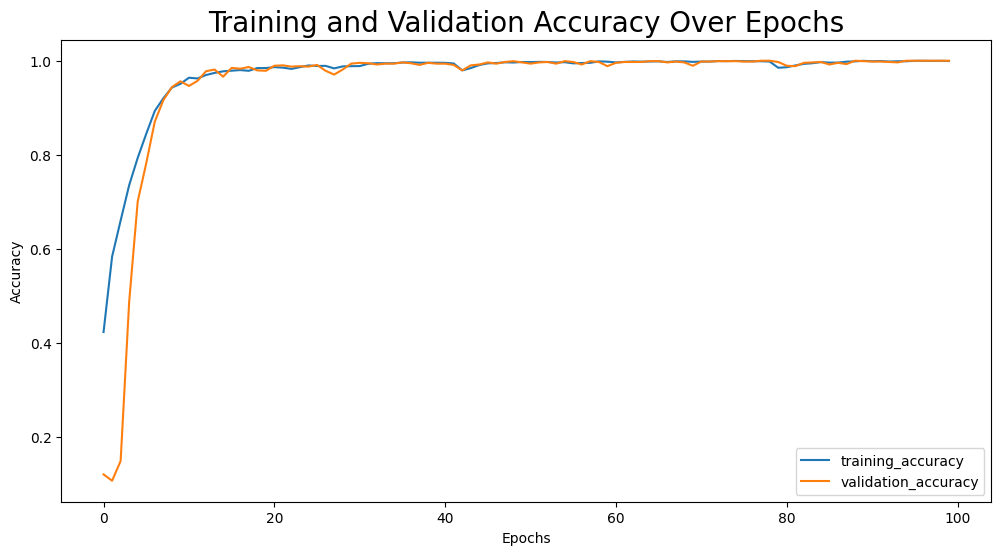

In [39]:
## Plot the results
epochs=list(range(100))
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(epochs,acc,label='training_accuracy')
ax.plot(epochs,val_acc,label='validation_accuracy')
ax.set_xlabel("Epochs")
ax.set_ylabel('Accuracy')
ax.set_title("Training and Validation Accuracy Over Epochs",size=20)
ax.legend()
plt.show()

## here we can see that the accuracy of th model is increasing after certain number of epochs 

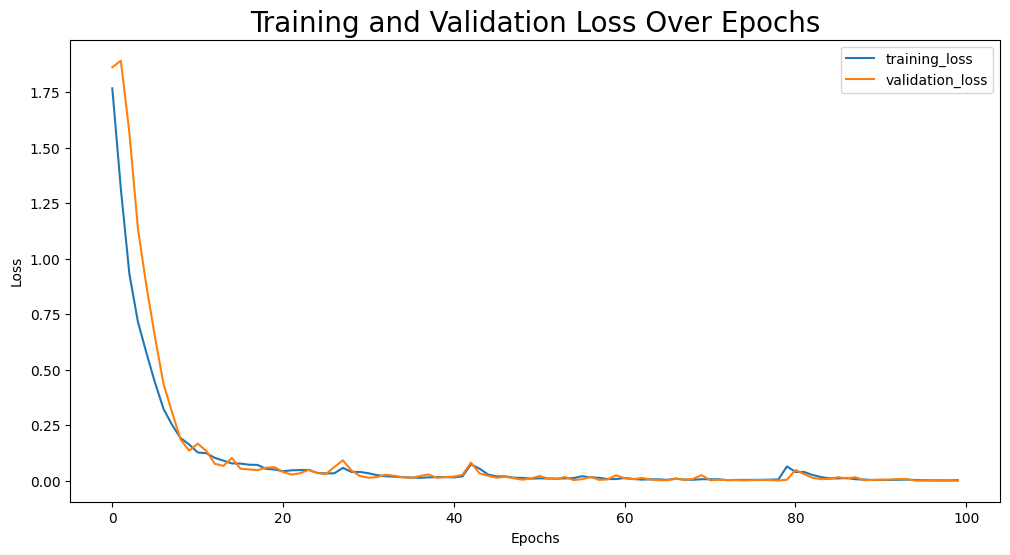

In [40]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(epochs,loss,label='training_loss')
ax.plot(epochs,val_loss,label='validation_loss')
ax.set_xlabel("Epochs")
ax.set_ylabel('Loss')
ax.set_title("Training and Validation Loss Over Epochs",size=20)
ax.legend()
plt.show()
## loss of train as well as validation is falling when number of epochs increasing

### Thankyou